/tmp/ipykernel_34/2180684156.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


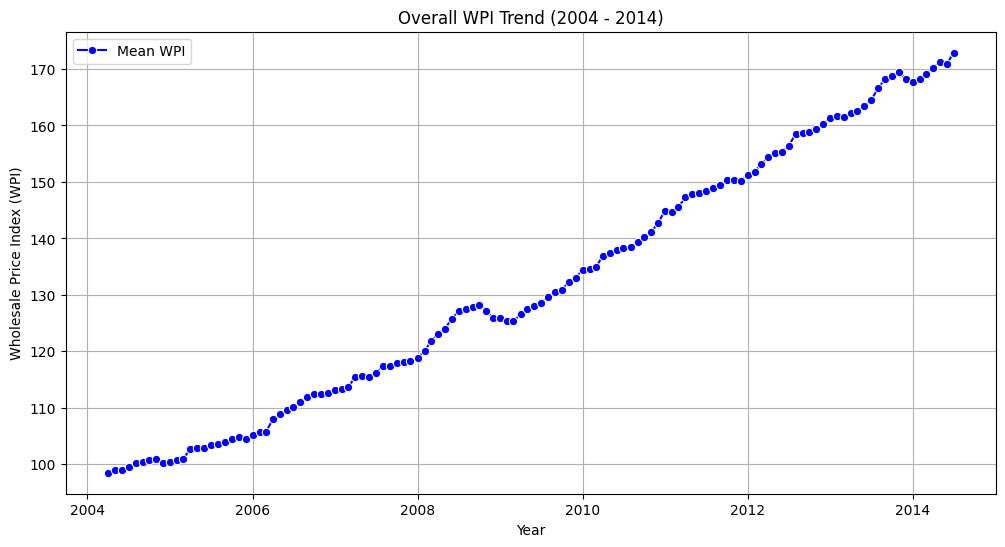

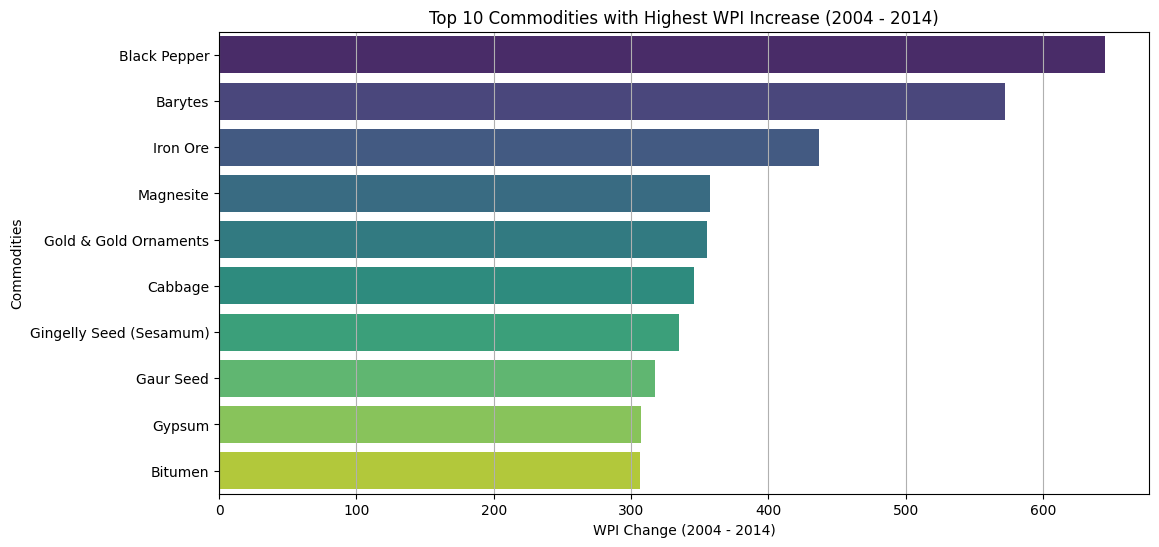

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


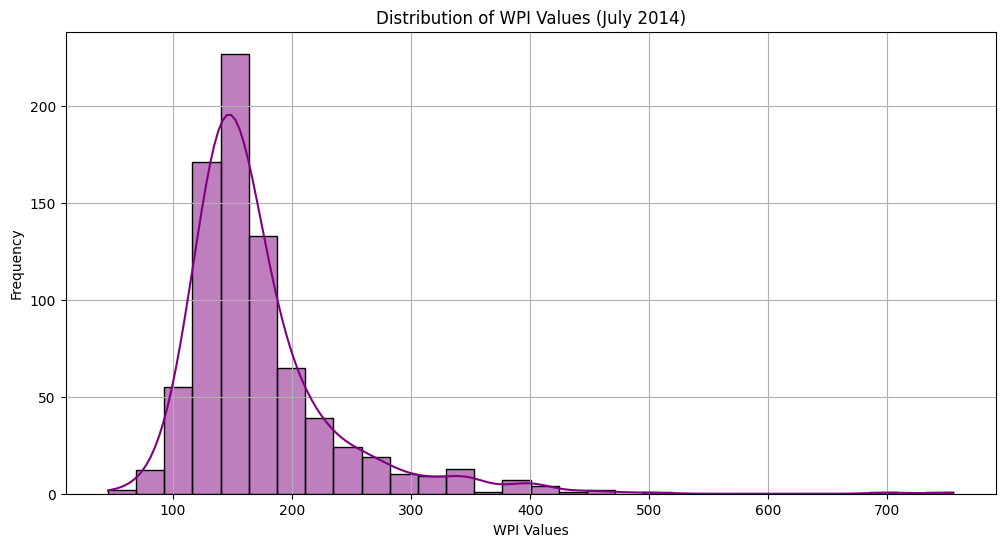

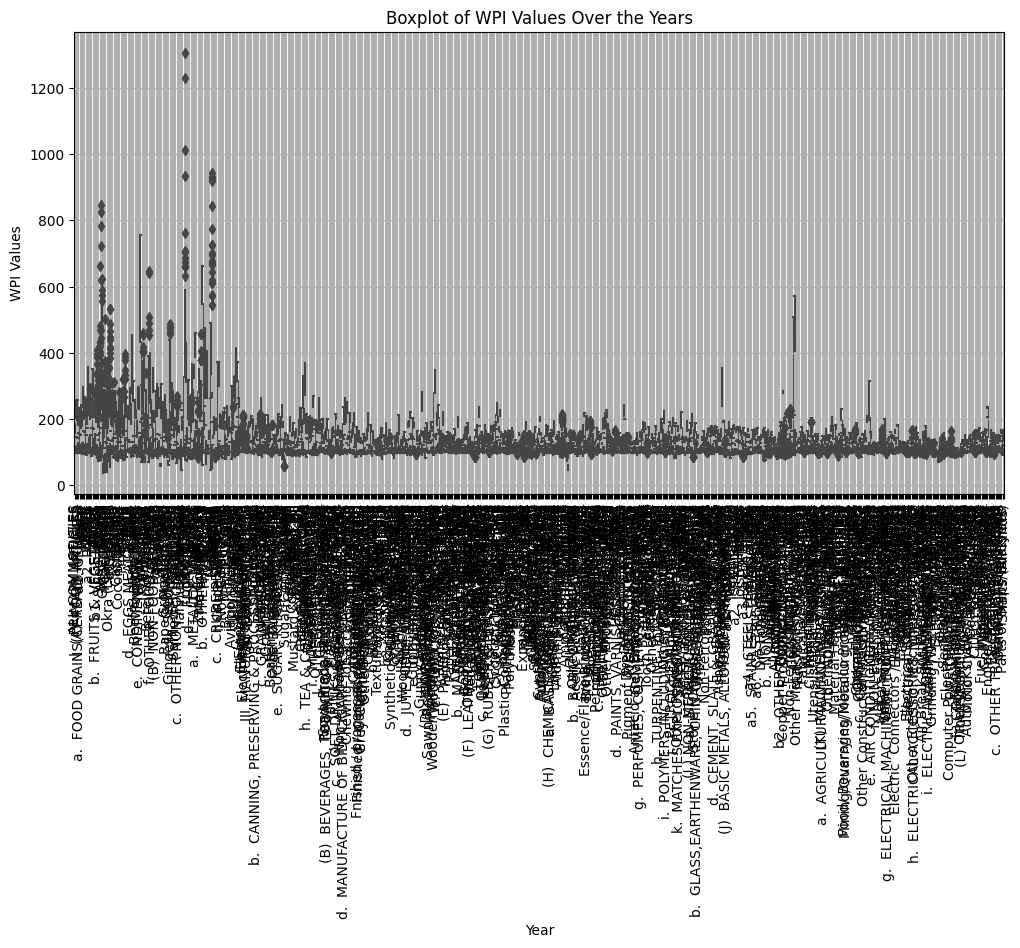

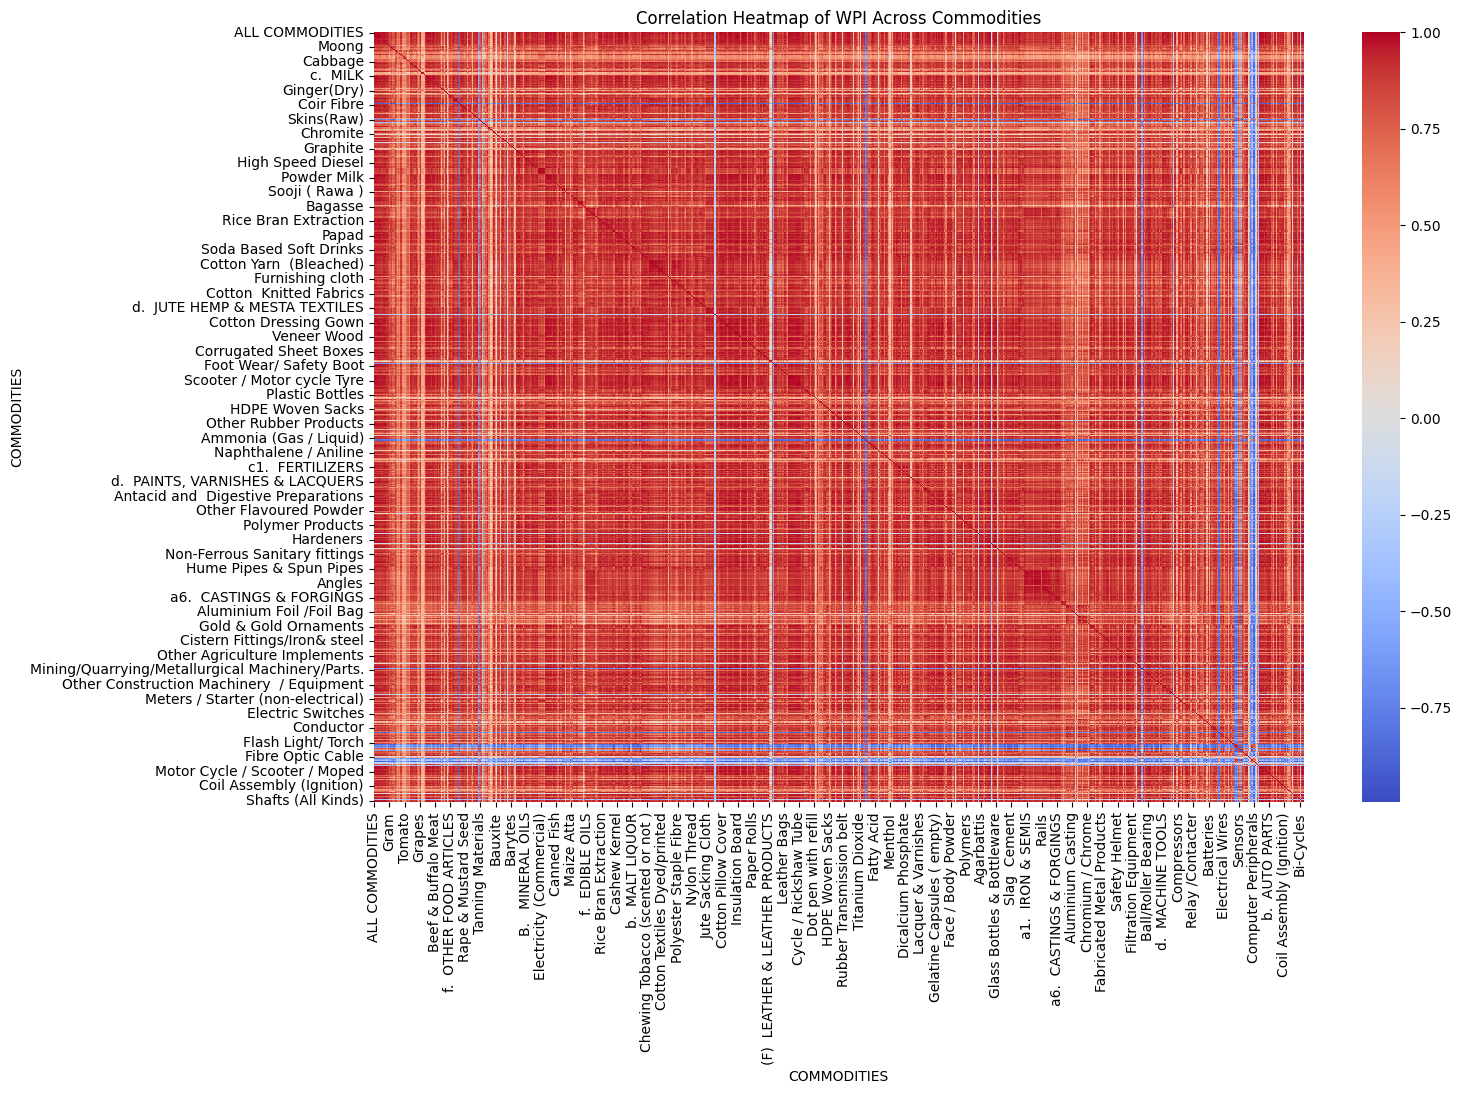

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("/kaggle/input/indiadata/WPI_July2014.csv")

# Data Cleaning
# Convert Weight column to numeric
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")

# Rename columns for better readability
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")

# Handle missing values using forward fill
df.fillna(method="ffill", inplace=True)

# Remove duplicate commodities
df_unique = df.drop_duplicates(subset=["COMMODITIES"], keep="first")

# Exploratory Data Analysis (EDA)
# Convert data to time-series format
df_tseries = df_unique.set_index("COMMODITIES").drop(columns=["Weight"]).T

df_tseries.index = pd.to_datetime(df_tseries.index, format="%b_%y")

# Calculate mean WPI across all commodities
df_tseries["Mean_WPI"] = df_tseries.mean(axis=1)

# Plot overall WPI trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_tseries.index, y=df_tseries["Mean_WPI"], marker="o", color="b", label="Mean WPI")
plt.xlabel("Year")
plt.ylabel("Wholesale Price Index (WPI)")
plt.title("Overall WPI Trend (2004 - 2014)")
plt.legend()
plt.grid(True)
plt.show()

# Compute WPI change from first to last available month
wpi_change = df_tseries.iloc[-1] - df_tseries.iloc[0]

# Get top 10 commodities with highest WPI increase
top_commodities = wpi_change.sort_values(ascending=False).head(10)

# Plot top commodities with highest WPI increase
plt.figure(figsize=(12, 6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")
plt.xlabel("WPI Change (2004 - 2014)")
plt.ylabel("Commodities")
plt.title("Top 10 Commodities with Highest WPI Increase (2004 - 2014)")
plt.grid(axis="x")
plt.show()

# Additional Graphs
# Distribution of WPI values for a specific year (2014)
plt.figure(figsize=(12, 6))
sns.histplot(df_tseries.loc["2014-07-01"], bins=30, kde=True, color="purple")
plt.xlabel("WPI Values")
plt.ylabel("Frequency")
plt.title("Distribution of WPI Values (July 2014)")
plt.grid(True)
plt.show()

# Boxplot to visualize WPI distribution across years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tseries.drop(columns=["Mean_WPI"]))
plt.xlabel("Year")
plt.ylabel("WPI Values")
plt.title("Boxplot of WPI Values Over the Years")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Heatmap of WPI correlations across commodities
plt.figure(figsize=(15, 10))
sns.heatmap(df_tseries.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of WPI Across Commodities")
plt.show()
